In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
from scipy.special import factorial
import math
from tqdm import tqdm

In [2]:
def hermite(x, k):
    if k == 0:
        return 1
    elif k == 1:
        return 2 * x
    else:
        return 2 * x * hermite(x, k - 1) - 2 * (k - 1) * hermite(x, k - 2)

In [3]:
# degrees = 360
# radians = degrees * np.pi / 180

In [4]:
#radians

In [5]:
#x = np.arange(0, 360, 29)
# x = np.linspace(0, np.pi, 22)
x = np.linspace(2/4*np.pi, 6/4*np.pi, 15)
sin_x = np.sin(x)

# beta = 0.001

l = np.arange(len(x), 0, -1) * 1.0

# f_x = np.zeros_like(x)

Hk_x = np.zeros_like(x)

In [6]:
#x = np.linspace(0, np.pi, 22)

In [7]:
#x1 = np.linspace(0, 2*np.pi, 44)

In [8]:
#x1

In [9]:
x

array([1.57079633, 1.7951958 , 2.01959528, 2.24399475, 2.46839423,
       2.6927937 , 2.91719318, 3.14159265, 3.36599213, 3.5903916 ,
       3.81479108, 4.03919055, 4.26359003, 4.48798951, 4.71238898])

In [10]:
sin_x

array([ 1.00000000e+00,  9.74927912e-01,  9.00968868e-01,  7.81831482e-01,
        6.23489802e-01,  4.33883739e-01,  2.22520934e-01,  1.22464680e-16,
       -2.22520934e-01, -4.33883739e-01, -6.23489802e-01, -7.81831482e-01,
       -9.00968868e-01, -9.74927912e-01, -1.00000000e+00])

In [11]:
# compute ck

ck = np.zeros_like(l)
for k in range(len(l)):
    ck[k] = (np.sqrt(np.pi) * (2 ** k) * factorial(k)) ** (-0.5)
fx = []

'''
for k in tqdm(range(len(x))):
    temp = l[k] * ck[k] * np.exp(-sin_x[k] * sin_x[k] / 2) * hermite(sin_x[k], k) + 0.001 * sin_x[k] * sin_x[k]
    fx.append(temp)
    
f_x = np.sum(fx)
    
'''

V = sin_x

In [12]:
V

array([ 1.00000000e+00,  9.74927912e-01,  9.00968868e-01,  7.81831482e-01,
        6.23489802e-01,  4.33883739e-01,  2.22520934e-01,  1.22464680e-16,
       -2.22520934e-01, -4.33883739e-01, -6.23489802e-01, -7.81831482e-01,
       -9.00968868e-01, -9.74927912e-01, -1.00000000e+00])

In [13]:
# B_k

B = []
for ki in tqdm(range(len(x))):
    # temp = ck[ki] * np.exp(-np.sin(x) * np.sin(x)/2) * hermite(np.sin(x), ki)
    temp = ck[ki] * np.exp(-x * x/2) * hermite(x, ki)
    B.append(temp)

100%|█████████████████████████████████████████| 15/15 [00:00<00:00, 1173.80it/s]


In [14]:
np.array(B).shape

(15, 15)

In [15]:
B_inv = np.linalg.inv(B)
C = np.dot(B_inv, V)
inter = np.dot(B, C)

In [16]:
inter

array([ 1.00023842e+00,  9.75168228e-01,  9.00875092e-01,  7.81433105e-01,
        6.23428345e-01,  4.34295654e-01,  2.22961426e-01, -4.88281250e-04,
       -2.23937988e-01, -4.34539795e-01, -6.22680664e-01, -7.80555725e-01,
       -9.00466919e-01, -9.74822998e-01, -9.99877930e-01])

In [17]:
# Non-Square Matrix B

B_new = []
for ki in tqdm(range(6)):
    # Calculate b_k 
    temp = ck[ki] * np.exp(x * x/2) * hermite(x, ki)
    B_new.append(temp)

B_new = np.array(B_new)

C_new = np.dot(V, np.dot(np.linalg.pinv(np.dot(B_new.T, B_new)), B_new.T))

pseudo_inverse = np.dot(C_new, B_new)

100%|███████████████████████████████████████████| 6/6 [00:00<00:00, 7861.86it/s]


In [18]:
pseudo_inverse

array([ 0.41087519,  0.45020369,  0.49462849,  0.53938384,  0.57432464,
        0.58038109,  0.52558837,  0.36412027,  0.04830724, -0.42550446,
       -0.91567032, -1.04393187, -0.56737805, -1.07426539, -0.99092955])

In [19]:
cond_square = np.linalg.cond(B)
cond_nonsquare = np.linalg.cond(B_new)

In [20]:
cond_square 

99135043532575.25

In [21]:
cond_nonsquare

348107726.45405865

square matrix condition number1: 99135043532575.25
non-square matrix condition number2: 348107726.45405865


<function matplotlib.pyplot.show(close=None, block=None)>

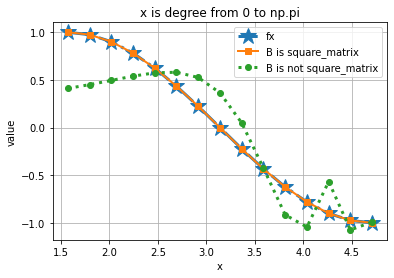

In [22]:
plt.plot(x, V, label = "fx", linestyle='-.', marker = '*', markersize=17, linewidth=3)
plt.plot(x, inter, marker = 's', linewidth=2, markersize=6, label = "B is square_matrix",)
plt.plot(x, pseudo_inverse, label = "B is not square_matrix", linestyle=':', marker = "o", markersize = 6, linewidth=3)

print("square matrix condition number1:", cond_square)
print("non-square matrix condition number2:", cond_nonsquare)

plt.xlabel("x")
# plt.xlim(0, 180)
plt.ylabel("value")
#plt.ylim(-1, 1.2)
plt.legend()
plt.grid()
plt.title("x is degree from 0 to np.pi")
plt.show

In [23]:
# plot function -4 and -3.5 
# plot function -4 to -1